In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\TINA\OneDrive\Desktop\EMIPredict AI\emi_prediction_dataset.csv")

print("Dataset Shape:", df.shape)
df.head()

C:\Users\TINA\AppData\Local\Temp\ipykernel_20348\4111334976.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\TINA\OneDrive\Desktop\EMIPredict AI\emi_prediction_dataset.csv")


Dataset Shape: (404800, 27)


,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,...,existing_loans,current_emi_amount,credit_score,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi
0,38.0,Female,Married,Professional,82600.0,Private,0.9,Mid-size,Rented,20000.0,...,Yes,23700.0,660.0,303200.0,70200.0,Personal Loan EMI,850000.0,15,Not_Eligible,500.0
1,38.0,Female,Married,Graduate,21500.0,Private,7.0,MNC,Family,0.0,...,Yes,4100.0,714.0,92500.0,26900.0,E-commerce Shopping EMI,128000.0,19,Not_Eligible,700.0
2,38.0,Male,Married,Professional,86100.0,Private,5.8,Startup,Own,0.0,...,No,0.0,650.0,672100.0,324200.0,Education EMI,306000.0,16,Eligible,27775.0
3,58.0,Female,Married,High School,66800.0,Private,2.2,Mid-size,Own,0.0,...,No,0.0,685.0,440900.0,178100.0,Vehicle EMI,304000.0,83,Eligible,16170.0
4,48.0,Female,Married,Professional,57300.0,Private,3.4,Mid-size,Family,0.0,...,No,0.0,770.0,97300.0,28200.0,Home Appliances EMI,252000.0,7,Not_Eligible,500.0


In [3]:
#                                                           Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404800 entries, 0 to 404799
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     404800 non-null  object 
 1   gender                  404800 non-null  object 
 2   marital_status          404800 non-null  object 
 3   education               402396 non-null  object 
 4   monthly_salary          404800 non-null  object 
 5   employment_type         404800 non-null  object 
 6   years_of_employment     404800 non-null  float64
 7   company_type            404800 non-null  object 
 8   house_type              404800 non-null  object 
 9   monthly_rent            402374 non-null  float64
 10  family_size             404800 non-null  int64  
 11  dependents              404800 non-null  int64  
 12  school_fees             404800 non-null  float64
 13  college_fees            404800 non-null  float64
 14  travel_expenses     

In [5]:
df.isnull().sum()

age                          0
gender                       0
marital_status               0
education                 2404
monthly_salary               0
employment_type              0
years_of_employment          0
company_type                 0
house_type                   0
monthly_rent              2426
family_size                  0
dependents                   0
school_fees                  0
college_fees                 0
travel_expenses              0
groceries_utilities          0
other_monthly_expenses       0
existing_loans               0
current_emi_amount           0
credit_score              2420
bank_balance              2426
emergency_fund            2351
emi_scenario                 0
requested_amount             0
requested_tenure             0
emi_eligibility              0
max_monthly_emi              0
dtype: int64

In [6]:
# Check duplicates
print("Duplicate rows:", df.duplicated().sum())

# Remove duplicates
df = df.drop_duplicates()

print("Shape after removing duplicates:", df.shape)

Duplicate rows: 0
Shape after removing duplicates: (404800, 27)


In [7]:
# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

# Fill numerical columns with median
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Fill categorical columns with mode
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Verify
df.isnull().sum()

C:\Users\TINA\AppData\Local\Temp\ipykernel_20348\1320969563.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\TINA\AppData\Local\Temp\ipykernel_20348\1320969563.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

age                       0
gender                    0
marital_status            0
education                 0
monthly_salary            0
employment_type           0
years_of_employment       0
company_type              0
house_type                0
monthly_rent              0
family_size               0
dependents                0
school_fees               0
college_fees              0
travel_expenses           0
groceries_utilities       0
other_monthly_expenses    0
existing_loans            0
current_emi_amount        0
credit_score              0
bank_balance              0
emergency_fund            0
emi_scenario              0
requested_amount          0
requested_tenure          0
emi_eligibility           0
max_monthly_emi           0
dtype: int64

In [8]:
print(df["emi_eligibility"].value_counts()) # Classification

emi_eligibility
Not_Eligible    312868
Eligible         74444
High_Risk        17488
Name: count, dtype: int64


In [9]:
print(df["max_monthly_emi"].describe()) # Regression

count    404800.000000
mean       6763.602156
std        7741.263317
min         500.000000
25%         500.000000
50%        4211.200000
75%        9792.000000
max       91040.400000
Name: max_monthly_emi, dtype: float64


In [10]:
# Splitting the data

#             For Classification (EMI Eligibility)
#X = df.drop(columns=["emi_eligibility", "max_monthly_emi"])
#y = df["emi_eligibility"]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#             For Regression (Max EMI Amount)
#X = df.drop(columns=["emi_eligibility", "max_monthly_emi"])
#y = df["max_monthly_emi"]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [11]:
#                                                              EDA

In [12]:
df["emi_eligibility"].value_counts()

emi_eligibility
Not_Eligible    312868
Eligible         74444
High_Risk        17488
Name: count, dtype: int64

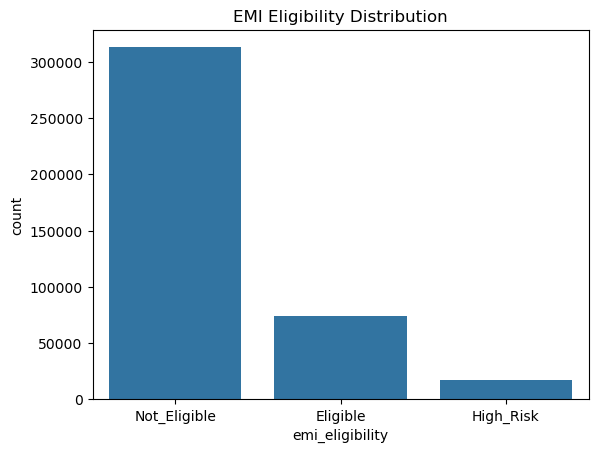

In [13]:
# Plot eligibility distribution
sns.countplot(x="emi_eligibility", data=df)
plt.title("EMI Eligibility Distribution")
plt.show()

C:\Users\TINA\AppData\Local\Temp\ipykernel_20348\2517899373.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["monthly_salary"].fillna(df["monthly_salary"].median(), inplace=True)


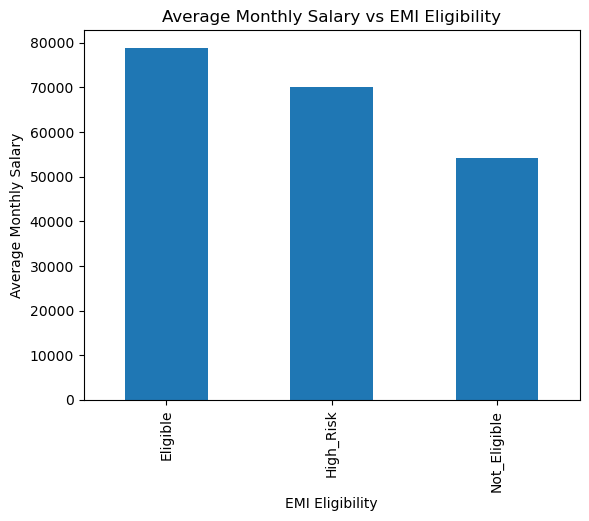

In [14]:
# Convert monthly_salary to numeric
df["monthly_salary"] = pd.to_numeric(df["monthly_salary"], errors="coerce")

df["monthly_salary"].fillna(df["monthly_salary"].median(), inplace=True)

salary_by_eligibility = df.groupby("emi_eligibility")["monthly_salary"].mean()

salary_by_eligibility.plot(kind="bar")
plt.xlabel("EMI Eligibility")
plt.ylabel("Average Monthly Salary")
plt.title("Average Monthly Salary vs EMI Eligibility")
plt.show()

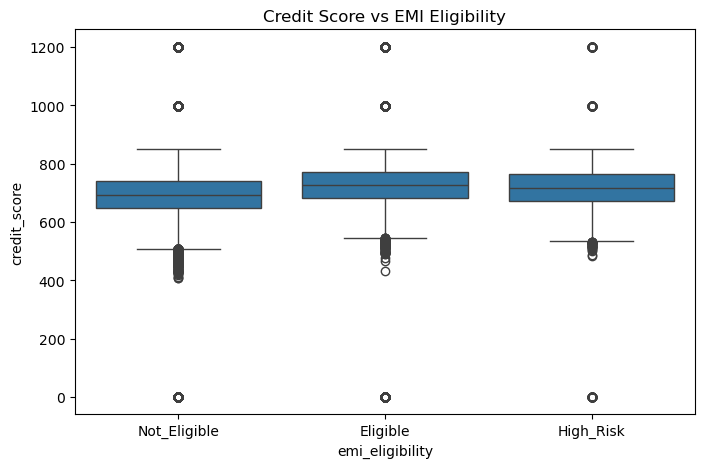

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(x="emi_eligibility", y="credit_score", data=df)
plt.title("Credit Score vs EMI Eligibility")
plt.show()

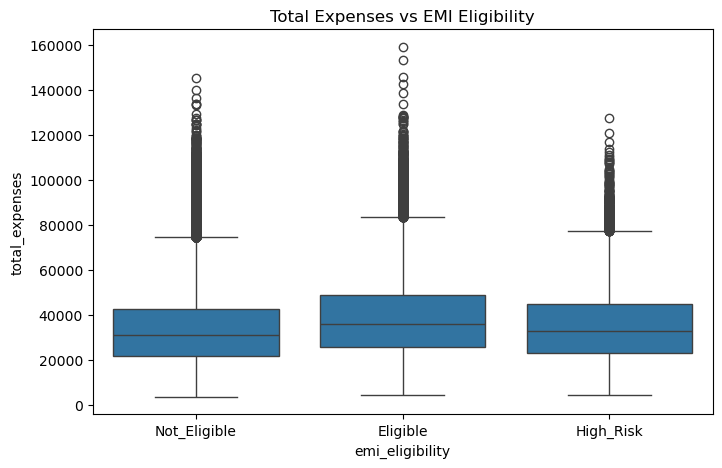

In [16]:
df["total_expenses"] = (
    df["school_fees"] +
    df["college_fees"] +
    df["travel_expenses"] +
    df["groceries_utilities"] +
    df["other_monthly_expenses"]
)

plt.figure(figsize=(8,5))
sns.boxplot(x="emi_eligibility", y="total_expenses", data=df)
plt.title("Total Expenses vs EMI Eligibility")
plt.show()

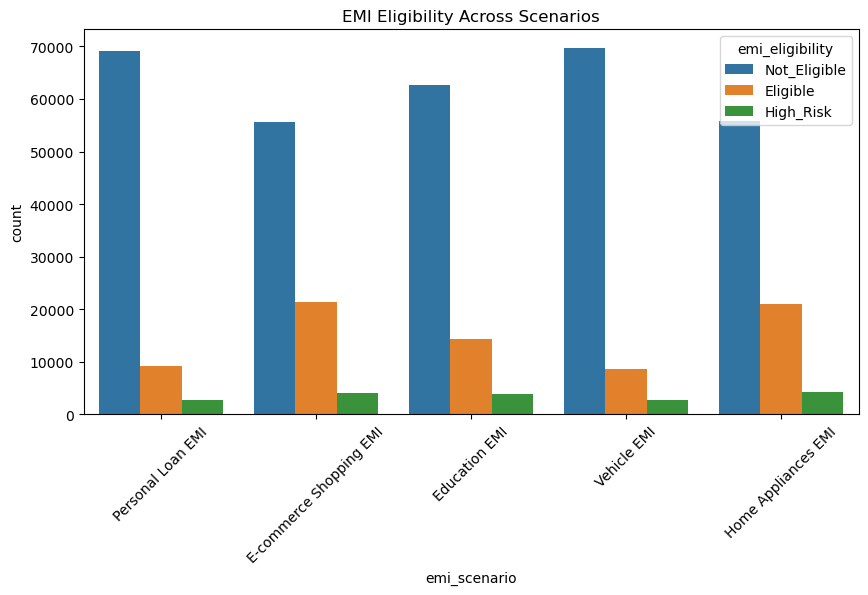

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(x="emi_scenario", hue="emi_eligibility", data=df)
plt.title("EMI Eligibility Across Scenarios")
plt.xticks(rotation=45)
plt.show()

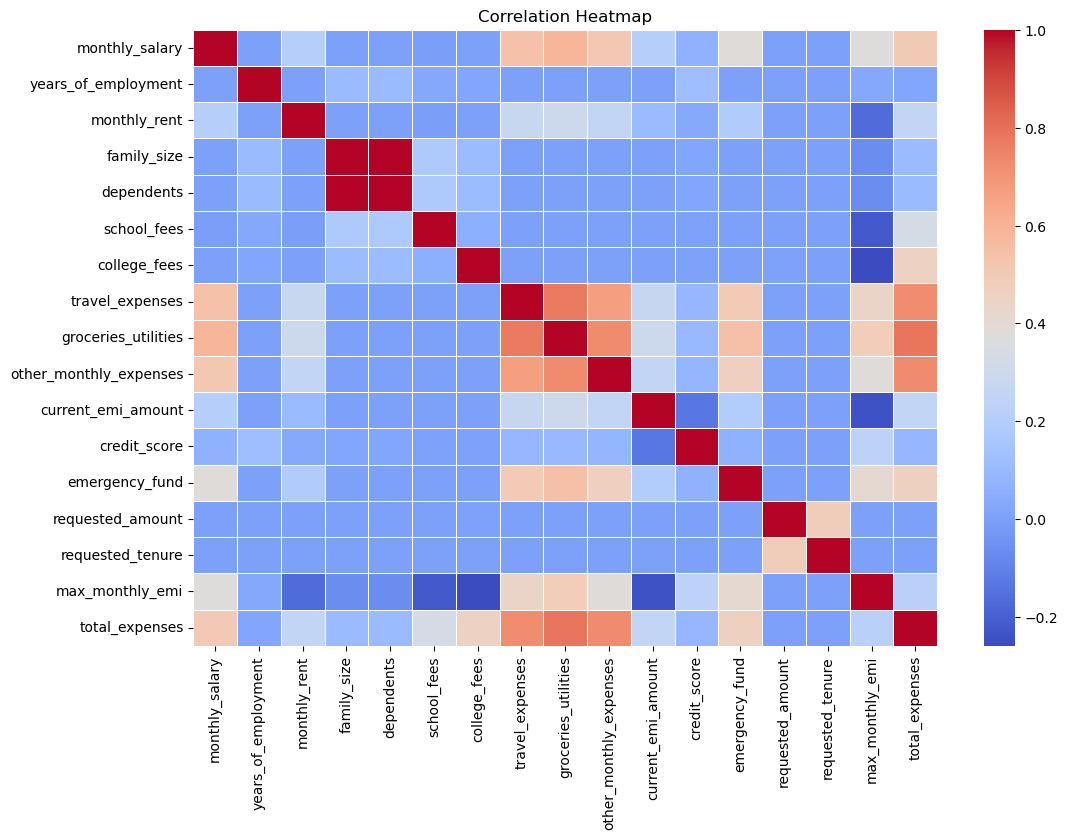

In [18]:
plt.figure(figsize=(12,8))
corr = df.select_dtypes(include=["int64", "float64"]).corr()

sns.heatmap(corr, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [19]:
#                                                       Feature Engineering 

In [20]:
df["total_expenses"] = (
    df["school_fees"] +
    df["college_fees"] +
    df["travel_expenses"] +
    df["groceries_utilities"] +
    df["other_monthly_expenses"])

In [21]:
# Debt-to-Income Ratio (DTI)
df["debt_to_income"] = df["current_emi_amount"] / df["monthly_salary"] # Higher DTI = higher financial risk
df["debt_to_income"].head()

0    0.286925
1    0.190698
2    0.000000
3    0.000000
4    0.000000
Name: debt_to_income, dtype: float64

In [22]:
# Expense-to-Income Ratio
df["expense_to_income"] = df["total_expenses"] / df["monthly_salary"] # Shows how much income is consumed by living expenses
df["expense_to_income"].head()

0    0.483051
1    0.716279
2    0.413473
3    0.559880
4    1.022688
Name: expense_to_income, dtype: float64

In [23]:
# EMI Affordability Ratio
df["emi_affordability"] = (df["monthly_salary"] - df["total_expenses"] - df["current_emi_amount"]) / df["monthly_salary"] # Higher value = better EMI affordability
df["emi_affordability"].head()

0    0.230024
1    0.093023
2    0.586527
3    0.440120
4   -0.022688
Name: emi_affordability, dtype: float64

In [24]:
# Credit Risk Score
def credit_risk(score):
    if score >= 750:
        return 1      # Low Risk
    elif score >= 650:
        return 2      # Medium Risk
    else:
        return 3      # High Risk

df["credit_risk_score"] = df["credit_score"].apply(credit_risk)
df["credit_risk_score"].head()

0    2
1    2
2    2
3    2
4    1
Name: credit_risk_score, dtype: int64

In [25]:
# Employment Stability Score
def employment_stability(years):
    if years >= 5:
        return 1      # Stable
    elif years >= 2:
        return 2      # Moderate
    else:
        return 3      # Unstable

df["employment_stability"] = df["years_of_employment"].apply(employment_stability) # Longer employment = lower risk
df["employment_stability"].head()

0    3
1    1
2    1
3    2
4    2
Name: employment_stability, dtype: int64

In [26]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

categorical_cols = [
    "gender",
    "marital_status",
    "education",
    "employment_type",
    "company_type",
    "house_type",
    "emi_scenario"
]

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [27]:
#                                                        Machine Learning Models

In [28]:
#                                                 Classification Models (EMI Eligibility)

In [29]:
#                                                        Logistic Regression 

In [30]:
from sklearn.model_selection import train_test_split

# Features
X = df.drop(columns=["emi_eligibility", "max_monthly_emi"])

# Target (Classification)
y = df["emi_eligibility"]

# Train–Test Split (75% – 25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [31]:
# Feature scaling 
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [32]:
# before trainig the model, we need some more cleaning for the X_train and y_train 

In [33]:
# Check data types
X_train.dtypes

age                        object
gender                      int64
marital_status              int64
education                   int64
monthly_salary            float64
employment_type             int64
years_of_employment       float64
company_type                int64
house_type                  int64
monthly_rent              float64
family_size                 int64
dependents                  int64
school_fees               float64
college_fees              float64
travel_expenses           float64
groceries_utilities       float64
other_monthly_expenses    float64
existing_loans             object
current_emi_amount        float64
credit_score              float64
bank_balance               object
emergency_fund            float64
emi_scenario                int64
requested_amount          float64
requested_tenure            int64
total_expenses            float64
debt_to_income            float64
expense_to_income         float64
emi_affordability         float64
credit_risk_sc

In [34]:
for col in X_train.columns:
    if X_train[col].dtype == "object":
        print(col)
        print(X_train[col].unique()[:5])
        print("-" * 30)

age
['48' 38.0 '32' 48.0 32.0]
------------------------------
existing_loans
['No' 'Yes']
------------------------------
bank_balance
['569200.0' '314200.0' '183400.0' '149200.0' '106900.0']
------------------------------


In [35]:
# Fix Numeric Columns Stored as Strings
for col in X_train.columns:
    X_train[col] = pd.to_numeric(X_train[col], errors="coerce")
    X_test[col] = pd.to_numeric(X_test[col], errors="coerce")

# Handle New Missing Values
# Fill NaN values created during conversion
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_train.median(), inplace=True)

In [36]:
# Many NaNs Exist
X_train.isna().sum().sort_values(ascending=False).head(10)

existing_loans            303600
age                            0
other_monthly_expenses         0
credit_risk_score              0
emi_affordability              0
expense_to_income              0
debt_to_income                 0
total_expenses                 0
requested_tenure               0
requested_amount               0
dtype: int64

In [37]:
# Fill ALL NaNs
# Fill remaining NaNs in training data
X_train = X_train.fillna(X_train.median())

# Fill test data using training median
X_test = X_test.fillna(X_train.median())

In [38]:
print(X_train.isna().sum().sum())
print(X_test.isna().sum().sum())

303600
101200


In [39]:
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test  = X_test.replace([np.inf, -np.inf], np.nan)

In [40]:
X_train = X_train.fillna(X_train.median())
X_test  = X_test.fillna(X_train.median())

In [41]:
X_train = X_train.fillna(0)
X_test  = X_test.fillna(0)

In [42]:
print("Train NaNs:", X_train.isna().sum().sum())
print("Test NaNs:", X_test.isna().sum().sum())

Train NaNs: 0
Test NaNs: 0


In [43]:
# Some engineered ratio features resulted in columns with undefined medians due to division effects. I handled this by first applying median imputation and then safely replacing any remaining missing values with zero to ensure full compatibility with Logistic Regression.

In [44]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

C:\Users\TINA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [45]:
y_pred = classifier.predict(X_test)
y_pred

array(['Not_Eligible', 'Not_Eligible', 'Not_Eligible', ...,
       'Not_Eligible', 'Not_Eligible', 'Not_Eligible'],
      shape=(101200,), dtype=object)

In [46]:
y_test

125961    Not_Eligible
9994      Not_Eligible
346305    Not_Eligible
52000     Not_Eligible
192630    Not_Eligible
              ...     
208810    Not_Eligible
26601     Not_Eligible
105083        Eligible
233869    Not_Eligible
309790    Not_Eligible
Name: emi_eligibility, Length: 101200, dtype: object

In [47]:
# Making confusion  matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11829    13  6826]
 [ 1277    10  2991]
 [ 3519    44 74691]]


In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score

accuracy_score(y_test, y_pred)

0.8550395256916996

In [49]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.8209945233288641
Recall: 0.8550395256916996
F1 Score: 0.8335424195737124


In [50]:
#                                                           Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [52]:
y_pred_rf = rf_model.predict(X_test)
y_pred_rf

array(['Not_Eligible', 'Not_Eligible', 'Not_Eligible', ...,
       'Not_Eligible', 'Not_Eligible', 'Not_Eligible'],
      shape=(101200,), dtype=object)

In [53]:
from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", cm_rf)

Confusion Matrix:
 [[16932    20  1716]
 [ 1357    75  2846]
 [  477     4 77773]]


In [54]:
from sklearn.metrics import accuracy_score

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.9365612648221344


In [55]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_rf = precision_score(y_test, y_pred_rf, average="weighted")
recall_rf = recall_score(y_test, y_pred_rf, average="weighted")
f1_rf = f1_score(y_test, y_pred_rf, average="weighted")

print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

Precision: 0.9288795039172291
Recall: 0.9365612648221344
F1 Score: 0.9173009724462697


In [56]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

    Eligible       0.90      0.91      0.90     18668
   High_Risk       0.76      0.02      0.03      4278
Not_Eligible       0.94      0.99      0.97     78254

    accuracy                           0.94    101200
   macro avg       0.87      0.64      0.64    101200
weighted avg       0.93      0.94      0.92    101200



In [57]:
#import pandas as pd

#feature_importance = pd.Series(rf_model.feature_importances_,index=X_train.columns).sort_values(ascending=False)

#print(feature_importance.head(10))

In [58]:
#                                                       XGBoost Classifier

In [59]:
pip install xgboost

  Using cached xgboost-3.1.2-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.1.2-py3-none-win_amd64.whl (72.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [60]:
from xgboost import XGBClassifier

In [61]:
# Check unique classes
y_train.unique()

array(['Eligible', 'Not_Eligible', 'High_Risk'], dtype=object)

In [62]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

In [63]:
xgb_model = XGBClassifier(objective="multi:softmax",num_class=3,n_estimators=100,learning_rate=0.1,max_depth=6,random_state=42,eval_metric="mlogloss")
xgb_model.fit(X_train, y_train_enc)

,objective,'multi:softmax'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


In [64]:
y_pred_xgb_enc = xgb_model.predict(X_test)

# Convert predictions back to original labels
y_pred_xgb = le.inverse_transform(y_pred_xgb_enc)

In [65]:
from sklearn.metrics import accuracy_score

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)

XGBoost Accuracy: 0.9474505928853755


In [66]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_xgb = precision_score(y_test, y_pred_xgb, average="weighted")
recall_xgb = recall_score(y_test, y_pred_xgb, average="weighted")
f1_xgb = f1_score(y_test, y_pred_xgb, average="weighted")

print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1 Score:", f1_xgb)

Precision: 0.9261993422238416
Recall: 0.9474505928853755
F1 Score: 0.9273838810289755


In [67]:
from sklearn.metrics import confusion_matrix

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix:\n", cm_xgb)

Confusion Matrix:
 [[17908    22   738]
 [ 1390    18  2870]
 [  297     1 77956]]


In [68]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

    Eligible       0.91      0.96      0.94     18668
   High_Risk       0.44      0.00      0.01      4278
Not_Eligible       0.96      1.00      0.98     78254

    accuracy                           0.95    101200
   macro avg       0.77      0.65      0.64    101200
weighted avg       0.93      0.95      0.93    101200



In [69]:
#                                                   Regression Models (Max EMI Amount)

In [70]:
#                                                           Linear Regression

In [75]:
y = df["max_monthly_emi"]
X = df.drop(["max_monthly_emi", "emi_eligibility"], axis=1)

In [86]:
for col in X.columns:
    if X[col].dtype == "object":
        # Try converting to numeric
        X[col] = pd.to_numeric(X[col], errors="ignore")

C:\Users\TINA\AppData\Local\Temp\ipykernel_20348\3381409471.py:4: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  X[col] = pd.to_numeric(X[col], errors="ignore")


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [89]:
cat_cols = X_train.select_dtypes(include="object").columns

le = LabelEncoder()

for col in cat_cols:
    X_train[col] = le.fit_transform(X_train[col].astype(str))
    X_test[col]  = le.transform(X_test[col].astype(str))

In [90]:
# Replace infinite values
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test  = X_test.replace([np.inf, -np.inf], np.nan)

# Fill NaNs with median
X_train = X_train.fillna(X_train.median())
X_test  = X_test.fillna(X_train.median())

# Final safety
X_train = X_train.fillna(0)
X_test  = X_test.fillna(0)

In [91]:
print("Train NaNs:", X_train.isna().sum().sum())
print("Test NaNs:", X_test.isna().sum().sum())

Train NaNs: 0
Test NaNs: 0


In [92]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [94]:
def clean_numeric_column(series):
    # Convert everything to string first
    series = series.astype(str)
    
    # Remove extra dots like 31100.0.0 → 31100.0
    series = series.str.replace(r'\.{2,}', '.', regex=True)
    
    # Convert to numeric
    series = pd.to_numeric(series, errors="coerce")
    
    return series

for col in X_train.columns:
    X_train[col] = clean_numeric_column(X_train[col])
    X_test[col]  = clean_numeric_column(X_test[col])

X_train = X_train.fillna(X_train.median())
X_test  = X_test.fillna(X_train.median())

# Final fallback
X_train = X_train.fillna(0)
X_test  = X_test.fillna(0)

print("Train NaNs:", X_train.isna().sum().sum())
print("Test NaNs:", X_test.isna().sum().sum())

Train NaNs: 0
Test NaNs: 0


In [95]:
y_pred = lr_model.predict(X_test)

In [98]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)

MAE: 11935.887574217206
RMSE: 15181.330070154476
R2 Score: -2.885683302920014


In [99]:
#                                                            Random Forest Regressor

In [100]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100,random_state=42,n_jobs=-1)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [101]:
y_pred_rf = rf_model.predict(X_test)

In [102]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest MAE :", mae_rf)
print("Random Forest RMSE:", rmse_rf)
print("Random Forest R2  :", r2_rf)

Random Forest MAE : 622.2837254189724
Random Forest RMSE: 1263.906644603055
Random Forest R2  : 0.9730674329490785


In [103]:
#                                                         XGBoost Regressor

In [104]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [106]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=200,learning_rate=0.1,max_depth=6,subsample=0.8,colsample_bytree=0.8,objective="reg:squarederror",random_state=42,n_jobs=-1)
xgb_model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [107]:
y_pred_xgb = xgb_model.predict(X_test)

In [108]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost MAE :", mae_xgb)
print("XGBoost RMSE:", rmse_xgb)
print("XGBoost R2  :", r2_xgb)

XGBoost MAE : 1067.3393849921406
XGBoost RMSE: 1840.187802551809
XGBoost R2  : 0.9429084214583304


In [109]:
#                                                         ML Flow

In [110]:
pip install mlflow

  Using cached protobuf-6.33.2-cp310-abi3-win_amd64.whl.metadata (593 bytes)
  Using cached starlette-0.50.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached annotated_doc-0.0.4-py3-none-any.whl.metadata (6.6 kB)
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   --------- ------------------------------ 2.1/9.1 MB 10.0 MB/s eta 0:00:01
   ------------------- -------------------- 4.5/9.1 MB 10.8 MB/s eta 0:00:01
   ------------------------------- -------- 7.1/9.1 MB 11.0 MB/s eta 0:00:01
   ---------------------------------------- 9.1/9.1 MB 10.8 MB/s  0:00:00
   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   ------------------------------------- -- 2.4/2.5 MB 11.3 MB/s eta 0:00:01
   ---------------------------------------- 2.5/2.5 MB 10.7 MB/s  0:00:00
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 9.1 MB/s  0:00:00
   ---------------------------------------- 0.0/77